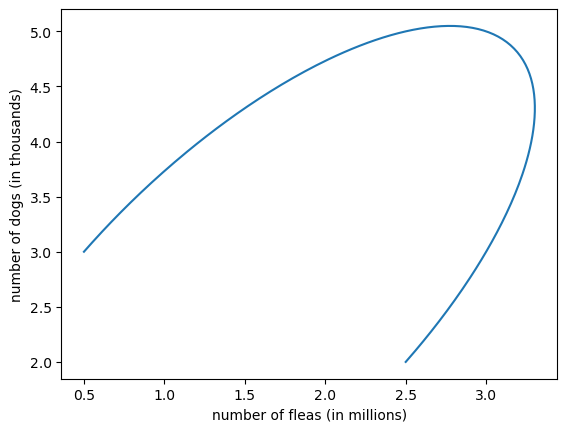

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve


N = 25*10+1;

a = np.linspace(-1,1,N)
equil = np.zeros([2,N])

for i in range(N):
    # f  = lambda x: np.exp(-alpha[i]*x) -x;
    # # fp = lambda a, x3: -a*np.exp(-a*3) - 1;
    # sol = fsolve(f, 1)
    # equil[i] = sol[0]
    equil[0][i]=(3-2*a[i])/(a[i]*a[i]+1)
    equil[1][i]=(a[i]+5)/(a[i]*a[i]+1)


plt.plot(equil[0], equil[1]);
plt.xlabel("number of fleas (in millions)");
plt.ylabel("number of dogs (in thousands)");


/tmp/ipykernel_756/1479993874.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i], Evec = np.linalg.eig(J(i));


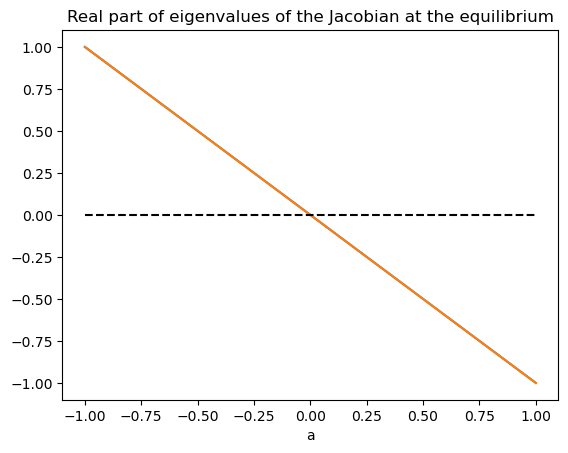

In [6]:
# Construct the Jacobian at the equilibrium for each alpha
#
# J(i) gives the Jacobian matrix for alpha[i] and its corresponding equilibrium

J = lambda i: np.array([[-(1+a[i]), 1],[-2,1-a[i]]]);

# Create the array that is going to store the real part of the eigenvalues of the Jacobian
eig = np.zeros([N,len(J(0))])

# Calculate the eigenvalues of the Jacobian
for i in range(N):
    eig[i], Evec = np.linalg.eig(J(i));
    eig[i].sort()

# Plot the eigenvalues of the Jacobian
for i in range(len(J(0))):
    plt.plot(a, eig[:,i])
plt.plot(a, np.zeros(N),'--k')
plt.xlabel('a');
plt.title('Real part of eigenvalues of the Jacobian at the equilibrium');


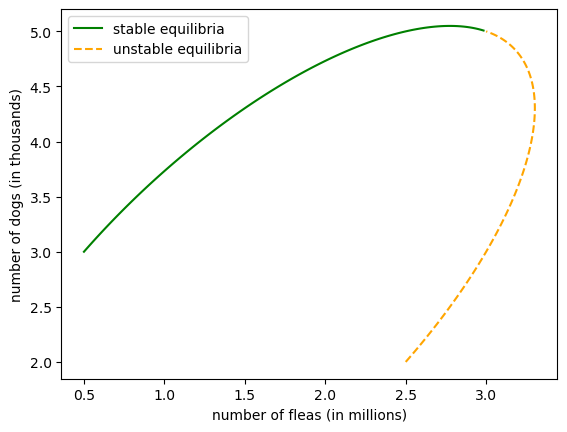

In [23]:
i_stable=[]
i_unstable=[]

for i in range(N):
    if (eig[i][0]<0) and (eig[i][1]<0):   # if the equilibrium i is stable
        i_stable.append(i)
    else :  # if the equilibrium i is unstable
        i_unstable.append(i)



plt.plot(equil[0][i_stable[:]],equil[1][i_stable[:]],color='green');
plt.plot(equil[0][i_unstable[:]],equil[1][i_unstable[:]],'--',color='orange');
plt.legend(["stable equilibria", "unstable equilibria"]);
plt.xlabel("number of fleas (in millions)");
plt.ylabel("number of dogs (in thousands)");
